In [1]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


import numpy as np
from collections import Counter
class KNN:
    def __init__(self, k, distance_metric="euclidean"):
        self.k = k
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None

    def fit(self, X: np.ndarray, y: np.ndarray):
        self.X_train = X
        self.y_train = y

    def predict(self, X: np.ndarray) -> np.ndarray:    
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _distance(self, x1: np.ndarray, x2: np.ndarray) -> float:
        if self.distance_metric == "euclidean":
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.distance_metric == "manhattan":
            return np.sum(np.abs(x1 - x2))
        else:
            raise ValueError("Invalid distance metric")

    def _predict(self, x: np.ndarray) -> int:
        distances = [self._distance(x, x_train) for x_train in self.X_train]
        k_idx = np.argsort(distances)[: self.k]
        k_labels = [self.y_train[i] for i in k_idx]
        most_common = Counter(k_labels).most_common()
        return most_common[0][0]
    
    def fit_predict(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        self.fit(X, y)
        return self.predict(X)
    

knn = KNN(k=3, distance_metric="manhattan")
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9666666666666667

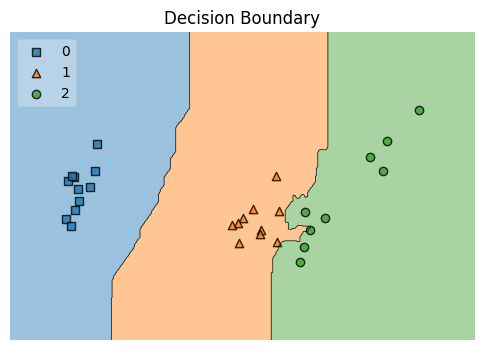

In [2]:
# Plot decision boundary
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Fit PCA on the training data
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

# Train the model with PCA-reduced training data
model = KNN(k=3, distance_metric="manhattan")
model.fit(X_pca_train, y_train)

# Plot decision regions with PCA-reduced test data
plt.figure(figsize=(6, 4))
plot_decision_regions(X_pca_test, y_test, clf=model, legend=2)
plt.axis('off')
plt.title('Decision Boundary')
plt.show()